# 105024519 許閔翔
## 應用多變量分析 HW2 SVD

In [2]:
import numpy as np
import pandas as pd

In [4]:
### 利用 R-package"mice" 補上 missing value，
### 但是仍有無法填補的值以及整欄皆為missing value的欄位，所以將其刪除。 
### import complete dataset.
df = pd.read_csv('anova_com.csv')
del df["Unnamed: 0"]
df_n = df.dropna(axis = 0)
print("Shape of dataset :", df.shape)
df_n.head()

Shape of dataset : (7703, 29)


,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LATITUDE,LONGITUDE,UGDS,UGDS_WHITE,UGDS_BLACK,...,INC_PCT_H1,INC_PCT_H2,PAR_ED_PCT_HS,PAR_ED_PCT_PS,FEMALE,MARRIED,DEPENDENT,VETERAN,UGDS_MEN,UGDS_WOMEN
1,3,4,3,4,6,33.402250,-111.966181,151558,0.3098,0.1555,...,0.032588,0.016600,0.483579,0.458333,0.697885,0.294515,0.087442,0.030455,0.3120,0.6880
2,1,2,1,18,3,39.803753,-86.158213,77657,0.7054,0.1523,...,0.051237,0.021793,0.460716,0.491131,0.610000,0.168002,0.412306,0.011384,0.4051,0.5949
3,2,3,1,12,5,25.777717,-80.190856,61470,0.0599,0.1657,...,0.009800,0.003386,0.440310,0.499123,0.578968,0.101984,0.687035,0.006174,0.4220,0.5780
4,2,2,1,48,6,30.188408,-95.490077,59920,0.3226,0.1892,...,0.040525,0.020516,0.446696,0.477633,0.625118,0.141618,0.463693,0.008098,0.4067,0.5933
5,2,2,1,48,6,29.737303,-95.376524,58084,0.1430,0.3182,...,0.021641,0.012542,0.421387,0.494151,0.598173,0.124644,0.454558,0.007061,0.4164,0.5836


### 將資料利用變數分成G1,G2和G3,G4,G5,G6兩群，然後取出UGDS前一百的學校。

In [5]:
# G1, G2 categorical features
column_name1 = ["PREDDEG", "HIGHDEG", "CONTROL", 
               "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE"]
# G3, G4, G5, G6 numerical features
column_name2 = ["UGDS", 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
               'DEP_STAT_PCT_IND', 'IND_INC_PCT_LO', 'DEP_INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 
               'INC_PCT_H1', 'INC_PCT_H2', 
               'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS',
               'FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'UGDS_MEN', 'UGDS_WOMEN']

df_cat = df_n[column_name1].iloc[:100, :]
df_num = df_n[column_name2].iloc[:100, :]

print("Shape of Categorical Dataset :", df_cat.shape)
print("Shape of Numerical Dataset :", df_num.shape)

Shape of Categorical Dataset : (100, 7)
Shape of Numerical Dataset : (100, 22)


## 然後將G3,G4,G5,G6的資料(df_num)標準化(Z)後，做SVD

In [7]:
from sklearn.preprocessing import StandardScaler

### Z-normalize df_num
sc = StandardScaler()
Z = sc.fit_transform(df_num)

### SVD
U, s, V = np.linalg.svd(Z, full_matrices = True)
S = np.zeros((100, 22), dtype=complex)
S[:22, :22] = np.diag(s)

print("USV' = Z ?", np.allclose(Z, np.dot(U, np.dot(S, V))))
print('U.shape', U.shape)
print('S.shape', S.shape)
print('V.shape', V.shape)
print('\nEigenvalues: \n%s' % s)

USV' = Z ? True
U.shape (100, 100)
S.shape (100, 22)
V.shape (22, 22)

Eigenvalues: 
[  3.01126459e+01   2.06755755e+01   1.43558282e+01   1.23792377e+01
   1.09385335e+01   9.60290175e+00   8.77581561e+00   7.47013900e+00
   6.36821249e+00   6.16112295e+00   4.85035494e+00   4.62600090e+00
   3.33460765e+00   2.96384686e+00   2.57032525e+00   2.19212293e+00
   1.79375130e+00   1.22741157e+00   1.07487752e+00   1.04586954e+00
   7.81989284e-09   7.27537095e-15]


## 將原本的標準化數值資料投影到主要和次要的eigenvector(pc1, pc2)。

In [9]:
from numpy.linalg import linalg

### project Z to eigenvector 1 and 2.
data_pro = np.dot(Z, V.T[:, :2])
### Combine
data_cat = np.array(df_cat)
result = pd.DataFrame(np.hstack([data_cat, data_pro]))
result.columns = ["PREDDEG", "HIGHDEG", "CONTROL", 
                  "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE", 
                  "pc1", "pc2"]
result.head()

,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LATITUDE,LONGITUDE,pc1,pc2
0,3.0,4.0,3.0,4.0,6.0,33.402250,-111.966181,-6.678287,2.579147
1,1.0,2.0,1.0,18.0,3.0,39.803753,-86.158213,-2.752622,1.137102
2,2.0,3.0,1.0,12.0,5.0,25.777717,-80.190856,-3.471500,-3.287762
3,2.0,2.0,1.0,48.0,6.0,30.188408,-95.490077,-3.290220,-0.645537
4,2.0,2.0,1.0,48.0,6.0,29.737303,-95.376524,-3.858308,-1.470806


# 將投影後的資料做圖。

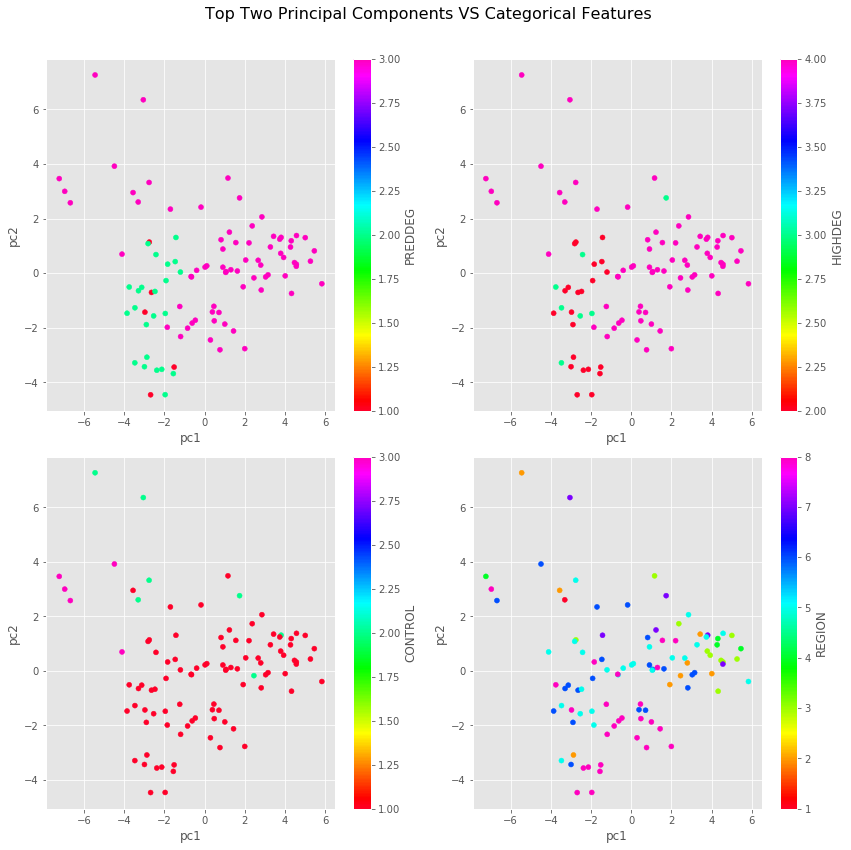

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

result.plot.scatter(ax=axes[0,0], x='pc1', y='pc2', c='PREDDEG', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[0,1], x='pc1', y='pc2', c='HIGHDEG', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[1,0], x='pc1', y='pc2', c='CONTROL', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[1,1], x='pc1', y='pc2', c='REGION', s = 25, colormap='gist_rainbow')

fig.tight_layout()
plt.suptitle("Top Two Principal Components VS Categorical Features", fontsize=16)
fig.subplots_adjust(top=0.92)
#plt.savefig('./output/svd圖.png', dpi=300)
plt.show()


>先將有興趣的四個categoricl features做散佈圖，其中發現"CONTROL"和"PREDDEG"有明顯的分群。

# 最後決定將"CONTROL"的圖形當作主要想分析討論的主題

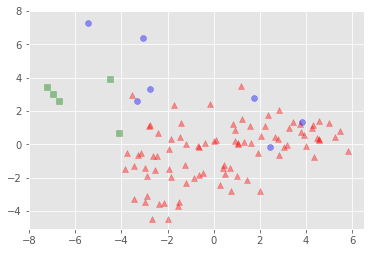

In [11]:
import matplotlib.pyplot as plt
import plotly.plotly as py

fig, ax = plt.subplots()

# 先利用另一種方法畫出原本散佈圖的點。
data_1 = np.array(result[result.CONTROL == 1])
data_2 = np.array(result[result.CONTROL == 2])
data_3 = np.array(result[result.CONTROL == 3])
ax.scatter(data_1[:, [7]], data_1[:, [8]], color='r', marker='^', alpha=.4)
ax.scatter(data_2[:, [7]], data_2[:, [8]], color='b', alpha=.4)
ax.scatter(data_3[:, [7]], data_3[:, [8]], color='g', marker='s', alpha=.4)
ax.autoscale()

plt.show()

>觀察上圖，<br/>
看出種類一的數量最多，並解多半集中在右下角。<br/>
而種類二其實算比較分散，但還是大約可以知道都出現在左上。<br/>
而第三種則是集中在左中的位置，自成一群。

>由此可知到人口數前一百名的學校在"CONTROL"的探討中，經過投影之後的資料就可以用視覺化的方式看出分群。
這也使資料的維度被大大減少，讓之後要加入討論的新資料就不需要收集全部變數，在計算複雜度上也能減少許多時間跟硬體空間。

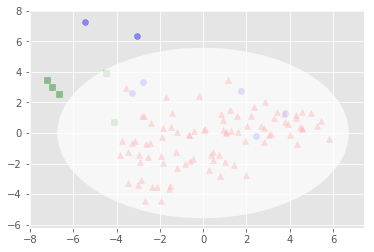

In [19]:
import matplotlib as mpl
import math

fig, ax = plt.subplots()

### 先利用另一種方法畫出原本散佈圖的點。
data_1 = np.array(result[result.CONTROL == 1])
data_2 = np.array(result[result.CONTROL == 2])
data_3 = np.array(result[result.CONTROL == 3])
ax.scatter(data_1[:, [7]], data_1[:, [8]], color='r', marker='^', alpha=.4)
ax.scatter(data_2[:, [7]], data_2[:, [8]], color='b', alpha=.4)
ax.scatter(data_3[:, [7]], data_3[:, [8]], color='g', marker='s', alpha=.4)

### 找出mean, r_x, r_y，再搭配"c"畫出橢圓形。
df_pro = pd.DataFrame(data_pro)
mean = np.array(df_pro.mean())
width = math.sqrt(s[0])*math.sqrt(5.99)
height = math.sqrt(s[1])*math.sqrt(5.99)
ell = mpl.patches.Ellipse(xy = mean, width = width, height = height, color = 'w', alpha = 0.7)

ax.add_patch(ell)
ax.autoscale()
plt.show()

>觀察上圖，我們利用95%的信心水準找出c平方的值為5.99，<br/>
然後再藉此與我們的主成份與次要成分的eigenvalue畫出橢圓。<br/>
然後從一開始取出的資料中我們原本共有100的點，<br/>
所以畫出的橢圓可以包涵95%的點，也就是剛好剩餘五個點沒被包含到。

>如果之後有別組資料進來，我們也可以利用這個橢圓去比較兩者資料的離散程度。<br/>
如果包涵的點比較多代表資料更集中，反之則比較分散。<br/>